In [6]:
import json
file = open('data.json', 'r', encoding='utf-8')
data = json.load(file)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

In [8]:
# Parse personal data
combined_rows = []

# Match entries by totalScore and grade
for stat_id, stat_data in data["statistics"].items():
    for stu_id, stu_data in data["students"].items():
        if (stat_data["grade"] == stu_data["studentGrade"] and
            stat_data["totalScore"] == stu_data["totalScore"] and
                stat_data["scores"] == stu_data["scores"]):

            row = {
                "ID_stat": stat_id,
                "ID_student": stu_id,
                "Gender": stat_data.get("gender"),
                "Grade": stat_data.get("grade"),
                "SurveyTime": stat_data.get("date"),
                "ParsedTime": stu_data.get("parsedDate"),
                "TotalScore": stat_data.get("totalScore")
            }
            # Include category scores
            row.update(stat_data["scores"])
            combined_rows.append(row)
            break

# Convert to DataFrame
df_combined = pd.DataFrame(combined_rows)

# Print final table
print(df_combined.to_string(index=False))

             ID_stat           ID_student Gender Grade SurveyTime         ParsedTime  TotalScore  불안 및 우울 문제  심리외상 문제  외현화 문제  자살 및 위기 문제  학교생활적응 문제
-ORO3afgAtqlPL9nX2G5 -ORO3afb_TN98Kofxvo2   girl   2학년  5월 29일 7시  2025-5-29 7:45:26          80          24       14       9          18         15
-ORO42E6AZfcaferUZKV -ORO42E2e1pii41jNKbl   girl   1학년  5월 29일 7시  2025-5-29 7:47:23           0           0        0       0           0          0
-ORO47TnvMiiv0gHk-3i -ORO47TjdZ_5jV43PcXi    boy   2학년  5월 29일 7시  2025-5-29 7:47:45           4           0        0       2           0          2
-ORO4eKQsY3AF-Cji_Rk -ORO4eKMBcwY5NWfbf_9   girl   2학년  5월 29일 7시   2025-5-29 7:50:3           7           6        0       0           0          1
-ORO5pZyLjX3rRv7QpeL -ORO5pZuPnJomqtF8JFn    boy   1학년  5월 29일 7시  2025-5-29 7:55:12          19           9        4       3           0          3
-ORO5zoeU-yf5-uvZosn -ORO5zobt7VtPF24uHBx    boy   1학년  5월 29일 7시  2025-5-29 7:55:54           9          

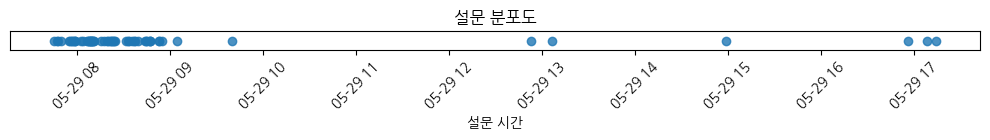

In [9]:
# Ensure ParsedTime is in datetime format
df_combined["ParsedTime"] = pd.to_datetime(df_combined["ParsedTime"])

# Sort by time for better x-axis layout
df_sorted = df_combined.sort_values("ParsedTime")

# Create dot plot
plt.figure(figsize=(10, 1.5))
plt.scatter(df_sorted["ParsedTime"], [1] * len(df_sorted), alpha=0.8)

plt.yticks([])  # Hide y-axis
plt.xlabel("설문 시간")
plt.title("설문 분포도")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


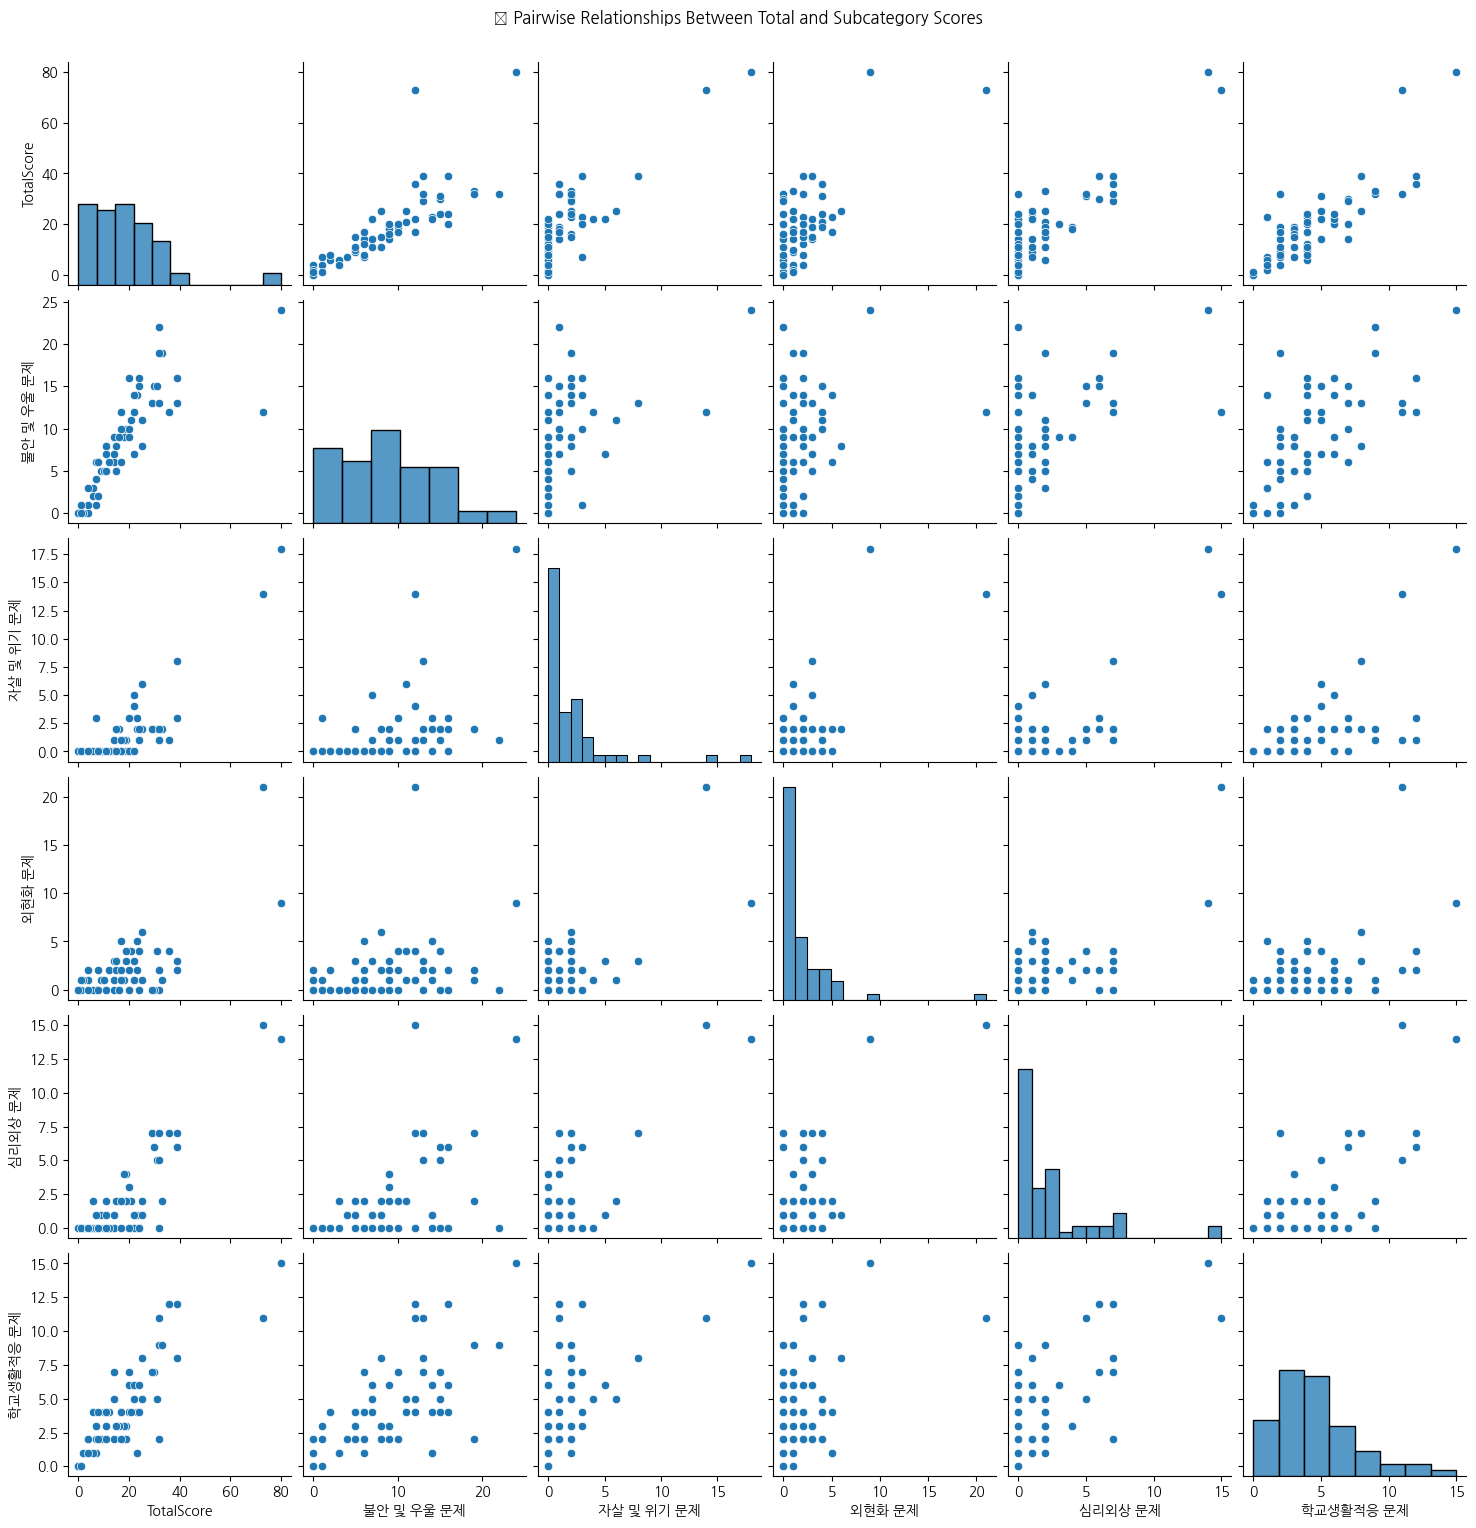

In [10]:
import seaborn as sns

score_columns = [
    "불안 및 우울 문제",
    "자살 및 위기 문제",
    "외현화 문제",
    "심리외상 문제",
    "학교생활적응 문제"
]

# Select relevant columns
subset = df_combined[["TotalScore"] + score_columns]

# Plot pairplot
sns.pairplot(subset)
plt.suptitle(
    "📊 Pairwise Relationships Between Total and Subcategory Scores", y=1.02)
plt.show()

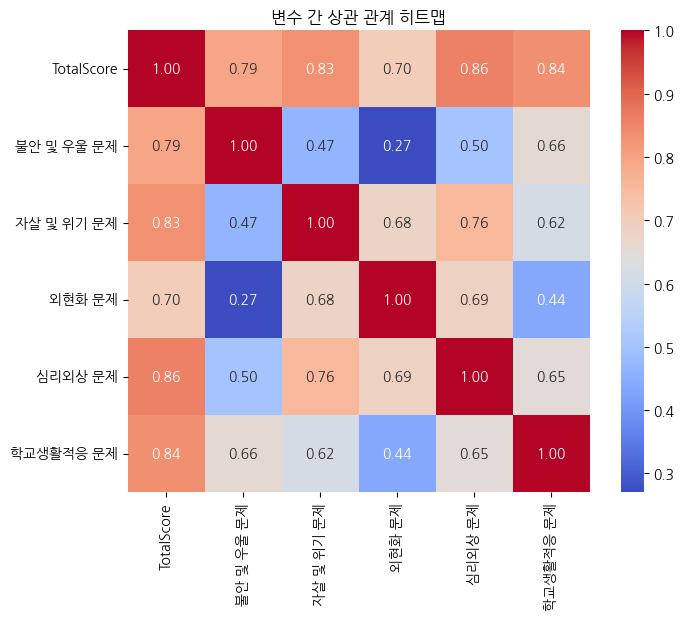

In [11]:
import numpy as np

# Compute correlation matrix
corr = subset.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("변수 간 상관 관계 히트맵")
plt.show()

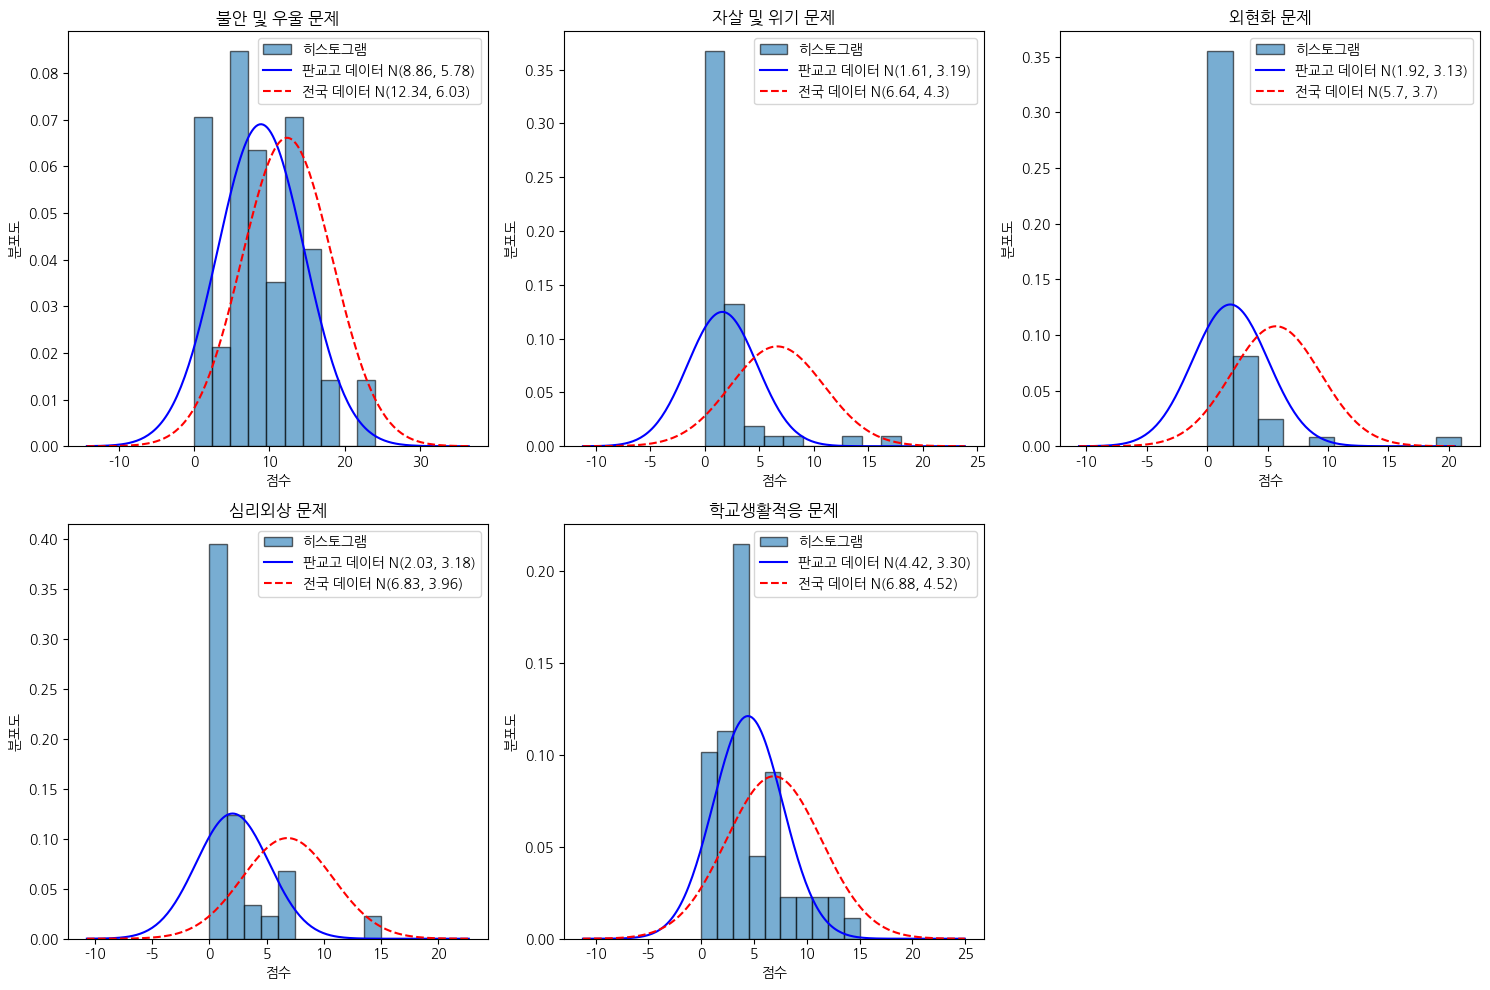

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define subcategory score columns
score_columns = [
    "불안 및 우울 문제",
    "자살 및 위기 문제",
    "외현화 문제",
    "심리외상 문제",
    "학교생활적응 문제"
]

# Baseline (reference) means and standard deviations for comparison
baseline_params = {
    "불안 및 우울 문제": (12.34, 6.03),
    "자살 및 위기 문제": (6.64, 4.30),
    "외현화 문제": (5.70, 3.70),
    "심리외상 문제": (6.83, 3.96),
    "학교생활적응 문제": (6.88, 4.52)
}

# Plot
plt.figure(figsize=(15, 10))

for i, col in enumerate(score_columns, 1):
    data = df_combined[col]
    mu = data.mean()
    sigma = data.std()

    # Get baseline parameters
    mu2, sigma2 = baseline_params[col]

    # Create a common x-axis range that includes both distributions
    x_min = min(mu - 4*sigma, mu2 - 4*sigma2)
    x_max = max(mu + 4*sigma, mu2 + 4*sigma2)
    x = np.linspace(x_min, x_max, 200)

    y1 = norm.pdf(x, mu, sigma)
    y2 = norm.pdf(x, mu2, sigma2)

    # Plot
    plt.subplot(2, 3, i)
    plt.hist(data, bins=10, density=True, alpha=0.6,
             edgecolor='black', label="히스토그램")
    plt.plot(x, y1, label=f'판교고 데이터 N({mu:.2f}, {sigma:.2f})', color='blue')
    plt.plot(
        x, y2, label=f'전국 데이터 N({mu2}, {sigma2})', linestyle='--', color='red')
    plt.title(col)
    plt.xlabel("점수")
    plt.ylabel("분포도")
    plt.legend()

plt.tight_layout()
plt.show()

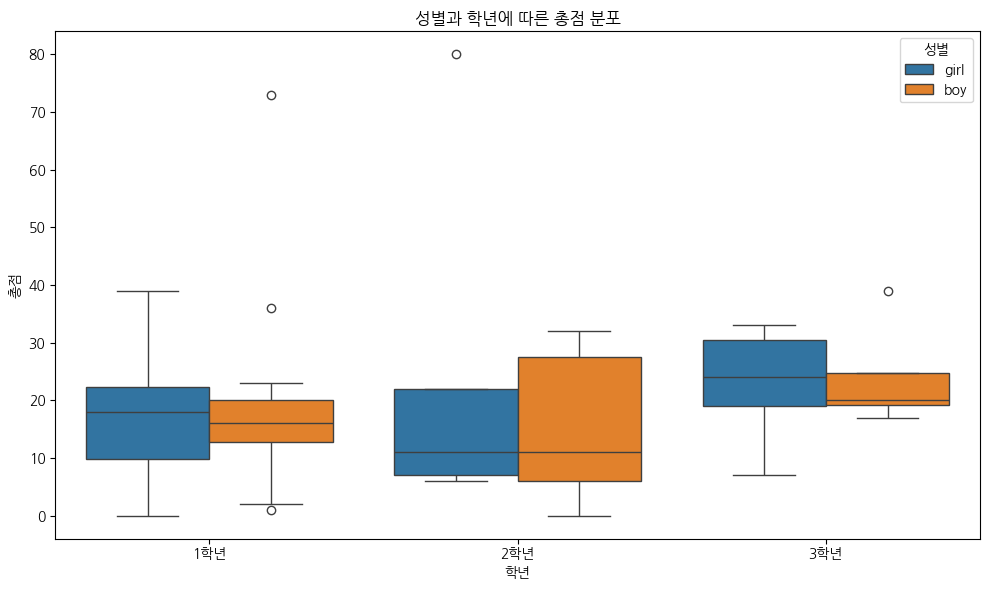

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: ensure grade is categorical and ordered
df_combined["Grade"] = pd.Categorical(df_combined["Grade"], ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grade", y="TotalScore", hue="Gender", data=df_combined)

plt.title("성별과 학년에 따른 총점 분포")
plt.xlabel("학년")
plt.ylabel("총점")
plt.legend(title="성별")
plt.tight_layout()
plt.show()

# O 이례적인 값, 선 이례적인 값 제외 최소 최대, 박스 상위 75%, 하위 25%

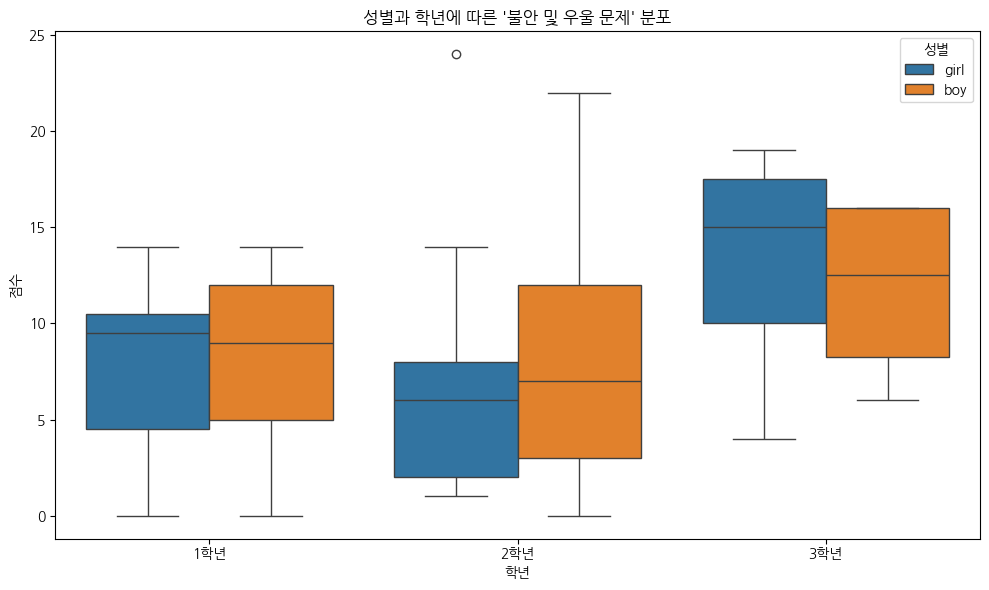

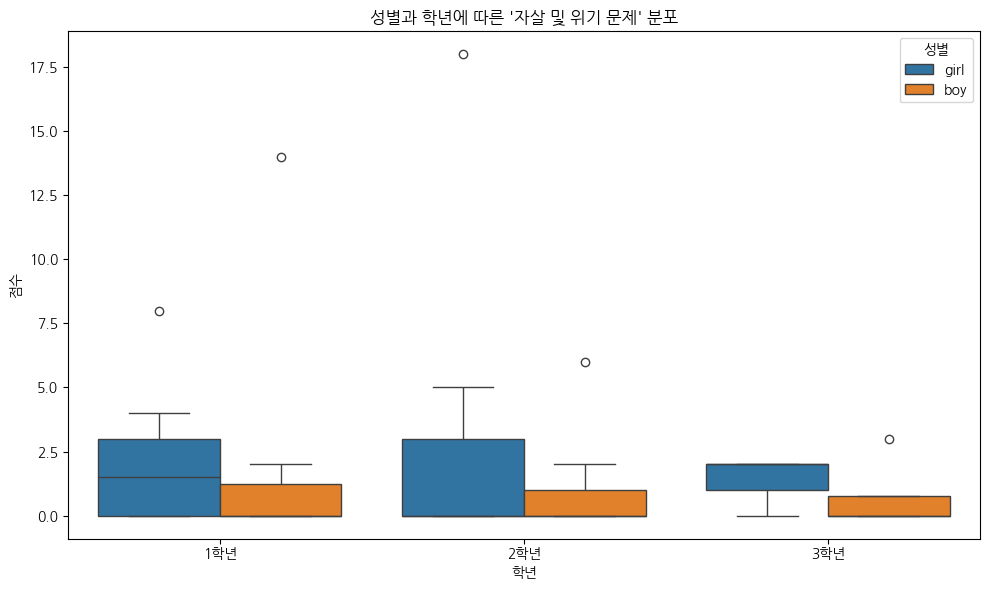

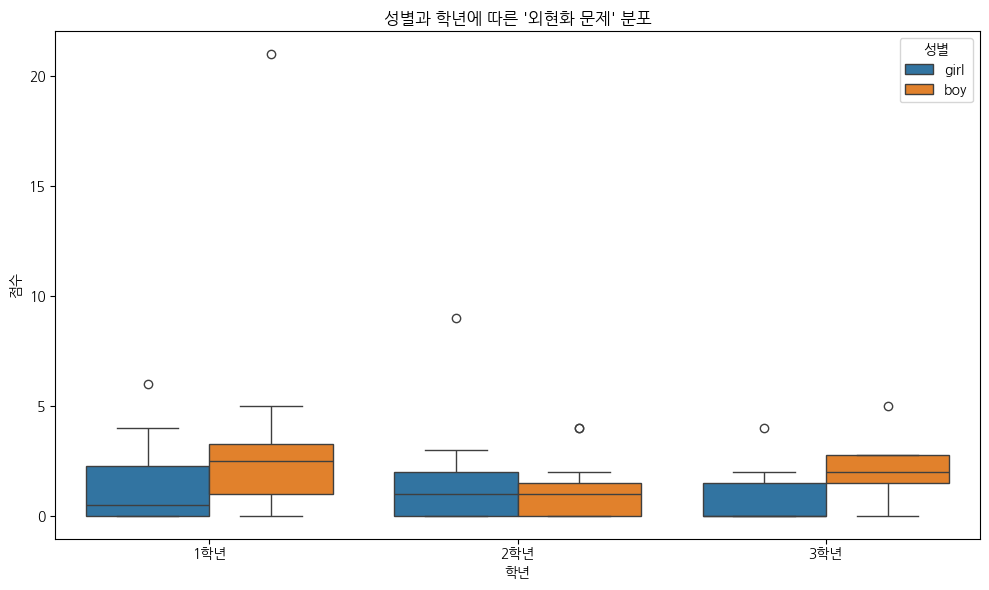

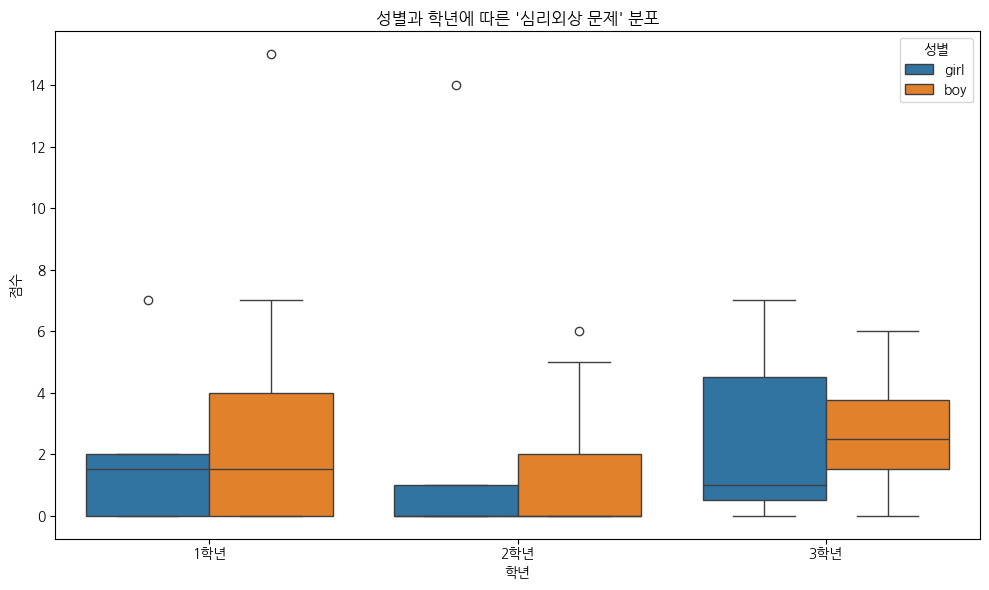

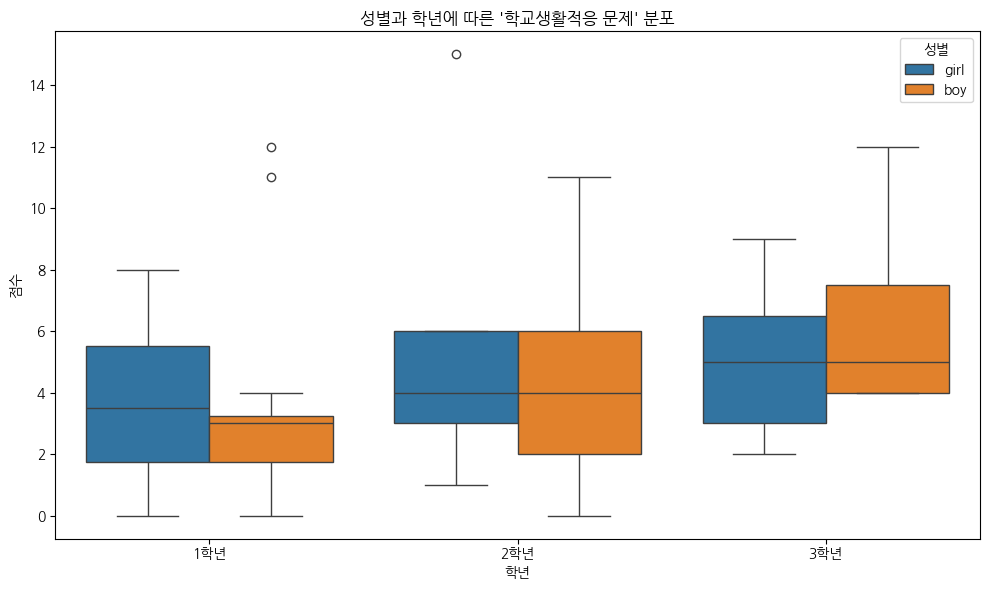

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define subcategory score columns
score_columns = [
    "불안 및 우울 문제",
    "자살 및 위기 문제",
    "외현화 문제",
    "심리외상 문제",
    "학교생활적응 문제"
]

# Ensure Grade is treated as an ordered category
df_combined["Grade"] = pd.Categorical(df_combined["Grade"], ordered=True)

# Plot for each category
for col in score_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Grade", y=col, hue="Gender", data=df_combined)
    plt.title(f"성별과 학년에 따른 '{col}' 분포")
    plt.xlabel("학년")
    plt.ylabel("점수")
    plt.legend(title="성별")
    plt.tight_layout()
    plt.show()